[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\abhij\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abhij\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abhij\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\abhij\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Data loaded successfully.


c:\Users\abhij\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'u', 'wa'] not in stop_words.
  warnings.warn(



--- Execution Summary ---
Original features (after lemmatization): 923
Reduced features (after PCA): 435


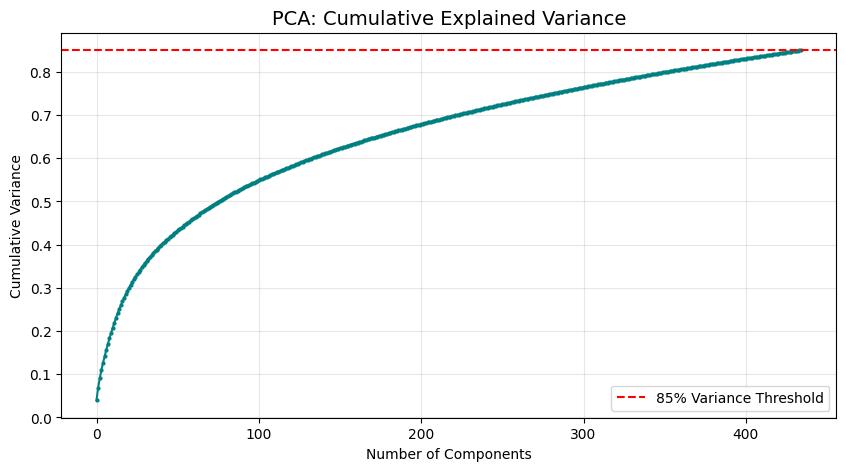


Sample of learned features (Keywords):
['cate blanchett' 'cezmi baskın' 'change life' 'child family'
 'childhood friend' 'china action' 'china hong' 'china international'
 'china united' 'chris parnell']


In [ ]:
# Notebook: 4_Vectorization_and_PCA.ipynb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt_tab')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# --- Pre-requisites for NLTK ---
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Custom Tokenizer Class
class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        # 1. Tokenize into words
        # 2. Keep only alphabetic words (removes numbers/punctuation)
        # 3. Lemmatize
        return [self.wnl.lemmatize(t.lower()) for t in word_tokenize(doc) if t.isalpha()]

# 1. Load the data
try:
    df = pd.read_csv('processed_netflix_data.csv')
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: 'processed_netflix_data.csv' not found.")

# 2. Optimized Vectorization
tfidf = TfidfVectorizer(
    tokenizer=LemmaTokenizer(),
    stop_words='english', 
    max_features=3000, 
    max_df=0.8,      
    min_df=10,         
    ngram_range=(2, 2),
    token_pattern=None 
)

tfidf_matrix = tfidf.fit_transform(df['total_content'].fillna(''))

# 3. Targeted PCA
pca = PCA(n_components=0.85, random_state=42)
tfidf_matrix_reduced = pca.fit_transform(tfidf_matrix.toarray())

# 4. SAVE THE FILES
np.save('matrix_reduced.npy', tfidf_matrix_reduced)
print(f"\n--- Execution Summary ---")
print(f"Original features (after lemmatization): {tfidf_matrix.shape[1]}")
print(f"Reduced features (after PCA): {tfidf_matrix_reduced.shape[1]}")

# 5. Visualize Explained Variance
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='teal', marker='o', markersize=2)
plt.axhline(y=0.85, color='r', linestyle='--', label='85% Variance Threshold')
plt.title('PCA: Cumulative Explained Variance', fontsize=14)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 6. Quick Check
features = tfidf.get_feature_names_out()
print("\nSample of learned features (Keywords):")
print(features[100:110])




In [ ]:
#Below are the primary codes used to obtain final working code. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# 1. Load the data
try:
    df = pd.read_csv('processed_netflix_data.csv')
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: 'processed_netflix_data.csv' not found.")

# 2. Optimized Vectorization
# Refine the TF-IDF to focus on words that actually distinguish genres
tfidf = TfidfVectorizer(
    stop_words='english', 
    max_features=5000, 
    max_df=0.8,       # Ignore words appearing in more than 80% of titles (too common)
    min_df=5,         # Ignore words appearing in fewer than 5 titles (too rare/noise)
    ngram_range=(1, 2) # Capture phrases like "romantic comedy" or "action packed"
)

# Transform the combined text column
tfidf_matrix = tfidf.fit_transform(df['total_content'].fillna(''))

# 3. Targeted PCA (Dimensionality Reduction)
# Lowering variance to 0.80-0.85 often improves clustering scores by removing 'textual noise'
pca = PCA(n_components=0.85, random_state=42)
tfidf_matrix_reduced = pca.fit_transform(tfidf_matrix.toarray())

# 4. Save the files
# save the reduced matrix for clustering and the feature names for interpretation
np.save('matrix_reduced.npy', tfidf_matrix_reduced)

print(f"\n--- Execution Summary ---")
print(f"Original feature count: {tfidf_matrix.shape[1]}")
print(f"Reduced feature count:  {tfidf_matrix_reduced.shape[1]}")
print(f"Success! Matrix saved as 'matrix_reduced.npy'")

# 5. Visualize Explained Variance
# This plot shows how many components are needed to represent your data
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='teal', linewidth=2)
plt.axhline(y=0.85, color='r', linestyle='--', label='85% Threshold')
plt.title('PCA: Cumulative Explained Variance', fontsize=14)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 6. Quick Check: Top Keywords captured
features = tfidf.get_feature_names_out()
print("\nSample of learned features (Keywords):")
print(features[100:110])

In [ ]:
# Notebook: 4_Vectorization_and_PCA.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# 1. Load the data from the previous step
df = pd.read_csv('processed_netflix_data.csv')

# 2. Vectorization (Turning text into a matrix)
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf.fit_transform(df['total_content'])

# 3. PCA (Dimensionality Reduction)
# convert to a dense array specifically for PCA
pca = PCA(n_components=0.95, random_state=42)
tfidf_matrix_reduced = pca.fit_transform(tfidf_matrix.toarray())

# 4. Save the file (This creates the missing .npy file)
np.save('matrix_reduced.npy', tfidf_matrix_reduced)

print(f"Success! Matrix saved as 'matrix_reduced.npy'")
print(f"Original features: {tfidf_matrix.shape[1]}")
print(f"Reduced features: {tfidf_matrix_reduced.shape[1]}")

# 5. Visualize variance
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [ ]:
#The above code combines the below 2 file codes to get the output.
# File: 4_tfidf_vectorization.py
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Load the processed data
df = pd.read_csv('processed_netflix_data.csv')

# 2. Initialize the TF-IDF Vectorizer
# max_features=5000: limit to the top 5000 most important words to keep the DB manageable.
# stop_words='english': Removes common words (the, is, in, etc.) automatically.
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# 3. Fit and Transform the text data into a Matrix
tfidf_matrix = tfidf.fit_transform(df['total_content'])

# 4. Check the shape of the matrix
# It should be (Number of Rows, 5000)
print(f"Matrix Shape: {tfidf_matrix.shape}")

# 5. See some of the features (words) the model identified
print("\n--- Sample Features (Words) ---")
print(tfidf.get_feature_names_out()[1000:1020])

Matrix Shape: (7787, 5000)

--- Sample Features (Words) ---
['cuba' 'cuesta' 'cuevas' 'culinary' 'cullen' 'cult' 'cultural' 'culture'
 'cultures' 'cumberbatch' 'cumming' 'cummings' 'cup' 'curiosity' 'curious'
 'curry' 'curse' 'curtis' 'cusack' 'cut']


Original shape: (7787, 5000)
Reduced shape: (7787, 3246)


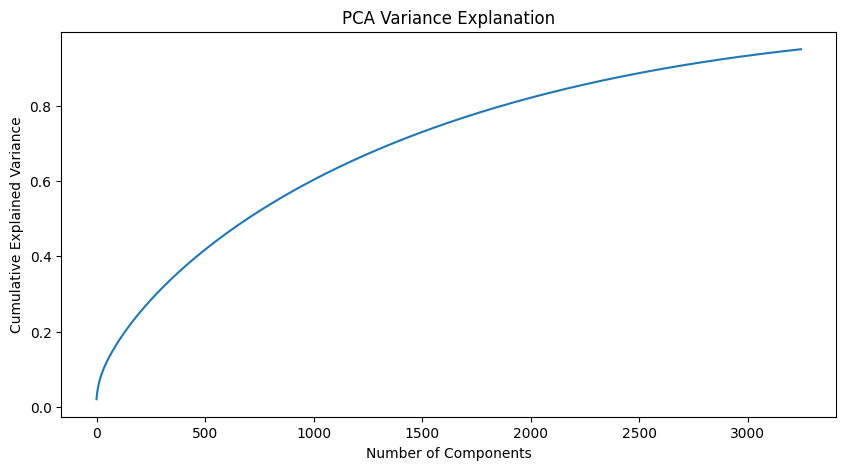

In [ ]:
# File: 5_dimensionality_reduction.py
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# 1. assume 'tfidf_matrix' is still in the memory from the previous step.

# 2. Initialize PCA
# want to reduce dimensions while keeping 95% of the original information (variance)
pca = PCA(n_components=0.95, random_state=42)
tfidf_matrix_reduced = pca.fit_transform(tfidf_matrix.toarray())

# 3. Check the new shape
print(f"Original shape: {tfidf_matrix.shape}")
print(f"Reduced shape: {tfidf_matrix_reduced.shape}")

# 4. Optional: Visualize the "Explained Variance" 
# This helps us see how many components were actually needed.
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Variance Explanation')
plt.show()